In [86]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap


In [111]:
# Data of Anjani, Bhargavi and Surada for training the model
df_features = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile.csv")

df_features['color'] = Series([(0 if x == "walking" else 1) for x in df_features['Label']])
my_color_map = ListedColormap(['r','g'],'mycolormap')
# 0,red,walking
# 1,green,running

df_unique = df_features.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape
print("Shape of training data", df_unique.shape)

X_train_data = df_unique.values[:, 2:45]
y_train_data = df_unique.values[:, 45]
usersList = set(df_features.values[:,0])
# print("Users for training the model")
# print(usersList)

Shape of training data (406, 47)
Users for training the model
{'user-id'}


In [112]:
# Data of 12 people for testing the model
df_features_test = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile_10.csv")

df_features_test['color'] = Series([(0 if x == "walking" else 1) for x in df_features_test['Label']])
my_color_map = ListedColormap(['r','g'],'mycolormap')
# 0,red,walking
# 1,green,running

df_unique_test = df_features_test.drop_duplicates(subset=['User', 'Timestamp'])
df_unique_test.head()
print("Shape of test data", df_unique_test.shape)

X_test = df_unique_test.values[:, 2:45]
y_test = df_unique_test.values[:, 45]
usersList = set(df_features_test.values[:,0])
print("Users for testing the model")
print(usersList)

Shape of test data (415, 47)
Users for testing the model
{'pgarg', 'cjain', 'mbaybay', 'ptiwari3', 'Chai', 'npbandal', 'jding11', 'achan', 'sbgavade', 'rpshah2', 'ahsu6', 'bbalasubramanian'}


In [116]:
# Fitting the logistic regression model
lr = LogisticRegression(C=0.01, random_state=10)
lr.fit(X_train_data, y_train_data)
predict = lr.predict(X_test)
logisticRegScore = lr.score(X_test, y_test)
print("Logistic regression Score")
print(logisticRegScore*100)
print("Importance of features")
print(lr.coef_)

Logistic regression Score
88.9156626506
Importance of features
[[ -6.97e-04  -3.10e-03  -5.46e-03  -3.68e-03   2.41e-03   6.92e-03
    9.30e-04  -7.65e-03  -9.62e-03  -4.21e-03  -1.97e-03  -6.75e-03
   -7.93e-03  -4.63e-03  -2.55e-03  -4.71e-03  -1.54e-03   1.16e-03
    1.54e-03   1.46e-03  -8.82e-04  -7.07e-04  -3.10e-03  -7.48e-03
   -8.12e-03  -6.55e-03  -2.04e-03   2.24e-03   1.89e-03  -2.51e-04
   -8.75e-02   5.63e-02   1.09e-01  -3.09e-01  -2.24e-01  -2.42e-01
    8.20e-02   1.63e-01  -3.09e-01  -3.55e-01  -2.70e-01  -3.04e-01
   -1.68e-02]]


In [114]:
# Confusion matrix analysis
cm = confusion_matrix(y_test, predict)
print(cm)

[[163  26]
 [ 20 206]]


Confusion matrix, without normalization
[[163  26]
 [ 20 206]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.09  0.91]]


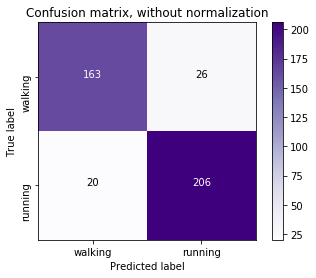

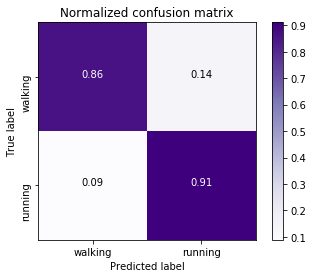

In [107]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')
# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr', dpi=1000)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr_normalized', dpi=1000)
plt.show()


In [117]:
#Area under ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder
# Compute fpr, tpr, thresholds and roc auc

# def encode_label(y_test):
#     y_test_binary = []
#     for y in y_test:
#         if y == "walking":
#             y_test_binary.append(0)
#         else:
#             y_test_binary.append(1)
#     return y_test_binary
# print(y_test)
# y_test_binary = encode_label(y_test)
# y_predict_binary = encode_label(predict)
# print(y_test_binary)
# print(y_predict_binary)
# # fpr, tpr, thresholds = roc_curve(y_test, predict, pos_label =2)
# roc_auc = auc(y_test_binary, y_predict_binary)


# # Plot ROC curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate or (1 - Specifity)')
# plt.ylabel('True Positive Rate or (Sensitivity)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")